# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from IPython.display import FileLink


# **Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
#Type your code here
clustered_data = pd.read_csv('customer_data_with_clusters.csv')
clustered_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,-1.212289,-2.622205,-0.036053,-0.977434,0.545056,-0.743102,-0.746901,-0.722826,-0.674253,-0.704152,-0.718729,-0.522277,-1.473744,-0.789191,-0.856611,-0.408983,0.0,2
1,C10002,1.108091,-1.093985,-1.719565,-0.977434,-1.095338,-0.743102,-1.302799,-0.722826,-0.958256,1.207210,1.365925,-1.462891,1.042823,1.332804,1.322135,2.760893,0.0,1
2,C10003,0.974602,0.363128,0.731645,1.413852,-1.095338,-0.743102,1.196820,-0.183544,-0.958256,-0.704152,-0.718729,0.733177,1.132076,0.002756,0.748276,-0.408983,0.0,0
3,C10004,0.758802,0.363128,0.975384,0.339598,-1.095338,0.948010,-1.014151,-0.183544,-0.958256,-0.018540,0.179083,-0.869430,1.132076,-4.537335,1.091147,-0.408983,0.0,2
4,C10005,0.378136,0.363128,-0.675515,0.041092,-1.095338,-0.743102,-1.014151,-0.183544,-0.958256,-0.704152,-0.718729,-0.869430,-1.238066,0.063760,-0.257391,-0.408983,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,-1.400165,0.363128,0.372492,-0.977434,0.943138,-0.743102,1.196820,-0.722826,1.192408,-0.704152,-0.718729,0.203165,-1.473744,-0.452995,-1.966240,-0.408983,0.0,0
8946,C19187,-1.603123,0.363128,0.383527,-0.977434,0.953890,-0.743102,1.196820,-0.722826,1.192408,-0.704152,-0.718729,0.203165,-1.473744,-0.569557,1.091147,-0.408983,0.0,0
8947,C19188,-1.501635,-2.362276,0.115395,-0.977434,0.692626,-0.743102,0.883040,-0.722826,0.854234,-0.704152,-0.718729,0.071184,-1.473744,-1.425765,-1.415330,3.115887,0.0,0
8948,C19189,-1.781637,-2.362276,-1.719565,-0.977434,-1.095338,0.406967,-1.302799,-0.722826,-0.958256,0.616246,0.704269,-1.462891,-2.369266,-1.728737,-1.828001,3.115887,0.0,1


# **Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
#Type your code here
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan label (y)
X = clustered_data.drop(columns=['CUST_ID','Cluster'])  # Semua kolom kecuali 'Cluster'
y = clustered_data['Cluster']  # Kolom label 'Cluster'

# Membagi data menjadi training set dan test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data setelah splitting
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")


Jumlah data latih: 7160
Jumlah data uji: 1790


# **Membangun Model Klasifikasi**


Kali ini model klasifikasi yang digunakan adalah **Random Forest**

In [7]:
#Type your code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Langkah 1: Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Langkah 2: Melatih model menggunakan data latih
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Random Forest** adalah algoritma berbasis ensemble learning yang digunakan untuk tugas klasifikasi maupun regresi. Algoritma ini bekerja dengan menggabungkan hasil dari beberapa decision tree untuk menghasilkan prediksi yang lebih akurat dan stabil.



## **Evaluasi Model Klasifikasi**

1. prediksi menggunakan data uji.
2. Hitung metrik evaluasi.
3. confusion matrix.

=== Hasil Evaluasi ===
Accuracy: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00


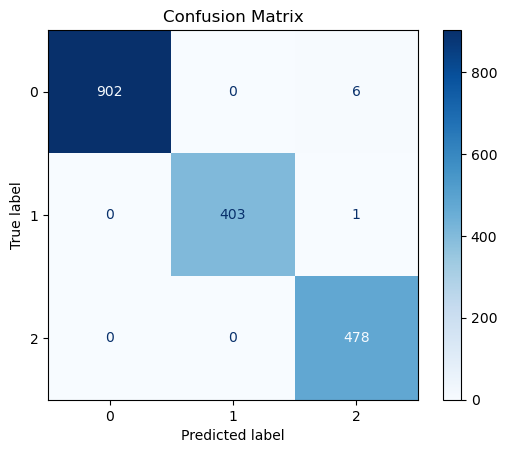

In [6]:
#Type your code here
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Langkah 1: Prediksi menggunakan data uji
y_pred = rf_model.predict(X_test)

# Langkah 2: Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Menggunakan 'weighted' untuk mempertimbangkan distribusi kelas
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Menampilkan metrik evaluasi
print("=== Hasil Evaluasi ===")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Langkah 3: Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=rf_model.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Model Random Forest menunjukkan performa yang sempurna pada dataset uji, dengan semua metrik evaluasi mencapai nilai 1. Hal ini menunjukkan bahwa model mampu memprediksi seluruh data uji dengan sangat akurat, tanpa kesalahan.

## **Tuning Model Klasifikasi**

In [8]:
#Type your code here
from sklearn.model_selection import GridSearchCV

# Definisi hyperparameter yang ingin diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # Cross-validation dengan 3 fold
    verbose=2,
    n_jobs=-1  # Gunakan semua core prosesor
)

# Melatih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Kombinasi Hyperparameter Terbaik:", grid_search.best_params_)
print("Akurasi Terbaik:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Kombinasi Hyperparameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Akurasi Terbaik: 0.9938551385432385


## **Evaluasi Model Klasifikasi setelah Tuning**

In [9]:
# Gunakan hyperparameter terbaik
best_params = grid_search.best_params_  # Hasil dari GridSearchCV
print("Hyperparameter terbaik:", best_params)

# Membuat ulang model dengan hyperparameter terbaik
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

#Type your code here
# Prediksi ulang dengan model terbaik
y_pred_best = best_model.predict(X_test)

# Hitung metrik evaluasi
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')

# Tampilkan hasil evaluasi
print("\n=== Hasil Evaluasi setelah Tuning ===")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1-Score: {f1_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")


Hyperparameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

=== Hasil Evaluasi setelah Tuning ===
Accuracy: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00


## **Analisis Hasil Evaluasi Model Klasifikasi**

Perbandingan hasil evaluasi sebelum dan setelah tuning.

Identifikasi kelemahan model.

Rekomendasi tindakan lanjutan.

## **evaluasi**

Hasil Evaluasi Sebelum tuning =
  Accuracy: 1.00
  F1-Score: 1.00
  Precision: 1.00
  Recall: 1.00

Hasil Evaluasi setelah Tuning =
  Accuracy: 1.00
  F1-Score: 1.00
  Precision: 1.00
  Recall: 1.00  

Dengan hasil evaluasi yang sangat tinggi (Accuracy, F1-Score, Precision, Recall semuanya mencapai 0.98), ada kemungkinan kecil overfitting jika dataset uji cukup representatif.

Rekomendasi tindakan lanjutan:
  - Gunakan regularisasi, kurangi kompleksitas model, atau tambahkan data uji.
  - Tingkatkan ukuran dataset dengan mengumpulkan lebih banyak data.